# Introduction

This is a Jupyter notebook implementation of the CERN Evaluation Test for the GSOC'19.   
A library implementation of the same can be found in repository.  
To install all the requirements run <code>'pip install -r requirements.txt'</code>  


# Task 1: Convert file name from UNIX to UTC and CERN Time

In [28]:
from datetime import datetime
from pytz import timezone
import os

fileName = '1541962108935000000_167_838.h5'
timeInt = int(fileName[:18])/(pow(10,9))
print(timeInt)

utcTime = datetime.utcfromtimestamp(timeInt)
cernZone = timezone('Europe/Zurich')
cernTime = utcTime.astimezone(cernZone)

print('UTC Time: ' + str(utcTime))
print('CERN Time: ' + str(cernTime))

154196210.8935
UTC Time: 1974-11-20 16:16:50.893500
CERN Time: 1974-11-21 01:16:50.893500+01:00


# Task 2: Classify all contents of the .h5 file

In [33]:
import h5py
import pandas as pd

categories = ['Name','Structure', 'DataType', 'Shape', 'Size']
lst = []

fileInput = h5py.File(fileName, 'r+')

def classify(name, obj):
    name = name.split("/")[-1]
    if(isinstance(obj, h5py.Dataset)):
        try:
            lst.append([name, 'Dataset', obj.dtype, obj.shape, obj.size])
        except TypeError:
            lst.append([name, 'Dataset', 'Unknown Type', obj.shape, obj.size])
    elif(isinstance(obj, h5py.Group)):
        lst.append([name, 'Group', None, None, None])
    


fileInput.visititems(classify)
db = pd.DataFrame(lst, columns = categories)
db.to_csv(fileName[:18] + '.csv',index=False)
db.head()

,Name,Structure,DataType,Shape,Size
0,AwakeEventData,Group,None,None,NaN
1,AIRTR01,Group,None,None,NaN
2,Acq,Group,None,None,NaN
3,numericPosition,Dataset,float32,"(1,)",1.0
4,AIRTR02,Group,None,None,NaN


# Task 3: Parsing an image from a 1D Array

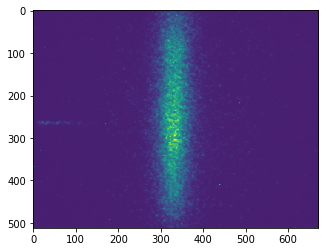

In [32]:
%matplotlib inline
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt

path = fileInput['AwakeEventData']['XMPP-STREAK']['StreakImage']
imageData = path['streakImageData']
imageHeight = path['streakImageHeight']
imageWidth = path['streakImageWidth']

imageArray = np.reshape(imageData, (imageHeight[0], imageWidth[0]))
img = medfilt(imageArray)
imgplot = plt.imshow(img)
plt.imsave('task3.png', img)